In [ ]:
# For Handling Data
import pandas as pd

# increase the output column width
pd.set_option('display.max_colwidth', 200)

# For numerical computing
import numpy as np

# Library for pattern matching
import re

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

# for NLP related tasks
import spacy
nlp=spacy.load('en_core_web_sm',disable=["tagger", "parser","ner"])

<font size=5>**Steps to Follow**</font>
1. Loading and Exploring Data
2. Text Cleaning
3. Data Preparation
    1. Label Encoding
    2. Split Data
    3. Feature Engineering using TF-IDF
4. Model Building
    1. Naive Bayes
    2. Logistic Regression
    3. Model Building Summary
5. Final Sentiment Analysis Pipeline

# Loading and Exploring Data

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read CSV file
df = pd.read_csv('/content/drive/My Drive/data/Tweets.csv')

#shape of the dataframe
print('Shape=>',df.shape)

#print the length of dataset
print('Length of data is:', len(df))

# print first 5 rows
df.head()

Shape=> (14640, 15)
Length of data is: 14640


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
#datatypes of all columns
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [ ]:
#checking for NULL values
np.sum(df.isnull().any(axis=1))

14638

In [ ]:
#to print number of rows and columns in dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   15
Count of rows in the data is:   14640


In [ ]:
df['tweet_id'].unique()

array([570306133677760513, 570301130888122368, 570301083672813571, ...,
       569587242672398336, 569587188687634433, 569587140490866689])

In [ ]:
df['tweet_id'].nunique()

14485

In [ ]:
# Some sample tweets
df['text'].sample(5)

8663                                                                               @JetBlue you're killing me now. :-) You got me! #smitten #trueblue
8894                                                                                                       @JetBlue rocking the Tim McGraw hold music
13654    @AmericanAir highly disappointed in the baggage service with this merge with @USAirways you guys have lost our 1st bag and now missing items
3025       @united 2nd time in a row  I've been over charged by 100's of $$ on my plane ticket WHY? #united I shouldn't have to check my CC everytime
665                                         @united common!! keep your paper work ready and don't delay our flights(#1585)and meetings @ChooseChicago
Name: text, dtype: object

In [ ]:
# class distribution
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# class distribution in percentage
df['airline_sentiment'].value_counts(normalize = True)*100

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64

In [ ]:
review_df = df[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [ ]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']
print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive


In [ ]:
review_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
#to retrieve all the text data from the dataset
tweet = review_df.text.values

In [ ]:
#to tokenize all the words in the text
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [ ]:
#to pad the sentences have equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

##Build the Text Classifier using LSTM(Long Short Term Memory network) from the ML

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 50s 162ms/step - loss: 0.4021 - accuracy: 0.8297 - val_loss: 0.2077 - val_accuracy: 0.9229
Epoch 2/5
289/289 [==============================] - 48s 166ms/step - loss: 0.2161 - accuracy: 0.9162 - val_loss: 0.1682 - val_accuracy: 0.9376
Epoch 3/5
289/289 [==============================] - 51s 176ms/step - loss: 0.1608 - accuracy: 0.9386 - val_loss: 0.1633 - val_accuracy: 0.9415
Epoch 4/5
289/289 [==============================] - 53s 184ms/step - loss: 0.1330 - accuracy: 0.9521 - val_loss: 0.1877 - val_accuracy: 0.9402
Epoch 5/5
289/289 [==============================] - 48s 166ms/step - loss: 0.1129 - accuracy: 0.9579 - val_loss: 0.1732 - val_accuracy: 0.9450


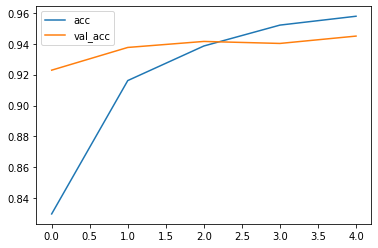

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

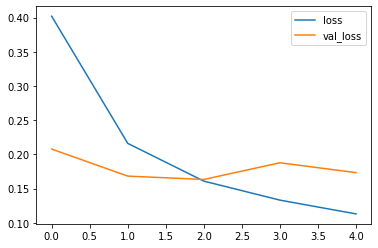

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I loved my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

# Text Cleaning

In [ ]:
#define a function for text cleaning
def text_cleaner(text):
  
  #remove user mentions
  text = re.sub(r'@[A-Za-z0-9]+','',text)           
  
  #remove hashtags
  #text = re.sub(r'#[A-Za-z0-9]+','',text)         
  
  #remove links
  text = re.sub(r'http\S+', '', text)  

  #convering text to lower case
  text = text.lower()

  # fetch only words
  text = re.sub("[^a-z]+", " ", text)

  # removing extra spaces
  text=re.sub("[\s]+"," ",text)
  
  # creating doc object
  doc=nlp(text)

  # remove stopwords and lemmatize the text
  tokens=[token.lemma_ for token in doc if(token.is_stop==False)]
  
  #join tokens by space
  return " ".join(tokens)

In [ ]:
# perform text cleaning
df['clean_text']= df['text'].apply(text_cleaner)

/usr/local/lib/python3.8/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
# save cleaned text and labels to a variable
text   = df['clean_text'].values
labels = df['airline_sentiment'].values

In [ ]:
# Sample cleaned text
text[:10]

array(['  said', '  plus ve added commercials experience tacky',
       '  didn t today mean need trip',
       '  s aggressive blast obnoxious entertainment guests faces amp little recourse',
       '  s big bad thing',
       '  seriously pay flight seats didn t playing s bad thing flying va',
       '  yes nearly time fly vx ear worm won t away',
       '  missed prime opportunity men hats parody', '  didn t d',
       '  amazing arrived hour early good'], dtype=object)

In [ ]:
# Sample labels
labels[:10]

array(['neutral', 'positive', 'neutral', 'negative', 'negative',
       'negative', 'positive', 'neutral', 'positive', 'positive'],
      dtype=object)

# Data Preparation

## Label Encoding

In [ ]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

#define label encoder
le = LabelEncoder()

#fit and transform target strings to a numbers
labels = le.fit_transform(labels)

In [ ]:
# Sample labels
labels[:10]

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 2])

In [ ]:
# Meaning of each label
le.inverse_transform([0,1,2])

array(['negative', 'neutral', 'positive'], dtype=object)

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting into train and validation set
x_train,x_val,y_train,y_val=train_test_split(text, labels,stratify=labels, test_size=0.2, random_state=0,shuffle=True)

In [ ]:
print('x_train:',x_train.shape,'y_train:',y_train.shape)
print('x_val:',x_val.shape,'y_val:',y_val.shape)

x_train: (11712,) y_train: (11712,)
x_val: (2928,) y_val: (2928,)


## Feature Engineering using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# initialize TFIDF
word_vectorizer = TfidfVectorizer(max_features=1000)

In [ ]:
# Fitting Vectorizer on Train set
word_vectorizer.fit(x_train)

TfidfVectorizer(max_features=1000)

In [ ]:
# create TF-IDF vectors for Train Set
train_word_features = word_vectorizer.transform(x_train)
train_word_features

<11712x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 65703 stored elements in Compressed Sparse Row format>

In [ ]:
# create TF-IDF vectors for Validation Set
val_word_features = word_vectorizer.transform(x_val)
val_word_features

<2928x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 16550 stored elements in Compressed Sparse Row format>

# Model Building

## Naive Bayes

In [ ]:
# Importing for modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [ ]:
# Training model
nb_model=MultinomialNB().fit(train_word_features,y_train)
nb_model

MultinomialNB()

In [ ]:
# Make predictions for train set
train_pred_nb=nb_model.predict(train_word_features)

In [ ]:
train_pred_nb

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
# Evaluating on Training Set
print("F1-score on Train Set:",f1_score(y_train,train_pred_nb,average="weighted"))

F1-score on Train Set: 0.7303326366733179


In [ ]:
# Make predictions for validation set
val_pred_nb=nb_model.predict(val_word_features)

# Evaluating on Validation Set
print("F1-score on Validation Set:",f1_score(y_val,val_pred_nb,average="weighted"))

F1-score on Validation Set: 0.6884471584231738


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Training model
lr_model=LogisticRegression().fit(train_word_features,y_train)
lr_model

LogisticRegression()

In [ ]:
# Make predictions for train set
train_pred_lr=lr_model.predict(train_word_features)
train_pred_nb

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
# Evaluating on Training Set
print("F1-score on Train Set:",f1_score(y_train,train_pred_lr,average="weighted"))

F1-score on Train Set: 0.8074180766755015


In [ ]:
# Make predictions for validation set
val_pred_lr=lr_model.predict(val_word_features)

# Evaluating on Validation Set
print("F1-score on Validation Set:",f1_score(y_val,val_pred_lr,average="weighted"))

F1-score on Validation Set: 0.7530566533332674


## Model Building Summary
|        Model        | Train Set | Validation Set |
|:-------------------:|:---------:|:--------------:|
|     Naive Bayes     |   0.7303  |     0.6884     |
| Logistic Regression |   0.8074  |     0.7530     |

It is evident from the results that Logistic Regression performs better than Naive Bayes on this dataset.

# Final Sentiment Analysis Pipeline

In [ ]:
def sentiment_analyzer(tweet):
  # Cleaning Tweet
  cleaned_tweet=text_cleaner(tweet)

  # Feature Engineering
  tweet_vector=word_vectorizer.transform([cleaned_tweet])

  # Predicting Sentiment
  label=lr_model.predict(tweet_vector)

  return le.inverse_transform(np.array(label))

<font size=4>**Sample Tweet:**</font>
<p>@USAirways flt 419. 2+ hrs Late Flight, baggage + 1 more hr. Now I see they delivered my suitcase wet inside &amp; out. #NotHappy</p>

In [ ]:
sentiment_analyzer("@USAirways flt 419. 2+ hrs Late Flight, baggage + 1 more hr. Now I see they delivered my suitcase wet inside &amp; out. #NotHappy")

/usr/local/lib/python3.8/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


array(['negative'], dtype=object)